## PROGRAM extrct
* Extracts data from the N-body output files Single.dat (fort.83)
* and Binary.dat (fort.82) relating to the overall cluster
* evolution, ie. half-mass radius and relaxation time, cluster mass,
* membership, core radius. 
* Note: planets are ignored in this version. 
*
* Output in extrct.dat: 
*
*   Number of single stars + binaries 
*   Number of binaries 
*   Time (Myr) 
*   Relaxation time (Myr) 
*   Total cluster mass (Msun) 
*   Mass in core (Msun) 
*   Mass outside the tidal radius (Msun) 
*   Maximum stellar distance from cluster centre of mass (pc) 
*   Half-mass radius (pc) 
*   Radius containing inner 10% of cluster mass (pc) 
*   Core radius - as determined by Nbody code (pc) 
*   Number of systems (stars + binaries) inside the half-mass radius   
*   Number of systems within 1pc of the cluster centre    
*   Number of systems within the inner lagrangian radius (10%)  
*   Number of systems within the core radius 
*   Velocity dispersion (km/s)

In [78]:
#Necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [66]:
from numpy import genfromtxt
with open("fort.83-h", 'r') as file:
    while file:
        line = file.readline()
        words = line.split()
        N = int(words[0])
        line2 = file.readline()
        words1 = line2.split()
        line3 = file.readline()
        words3 = line3.split()
        #array_type = np.zeros([N+1,13]) # Need to create this via numpy and should be the right dimensions
        blockS = genfromtxt(file)#, dtype=array_type, delimiter=' ')
        break

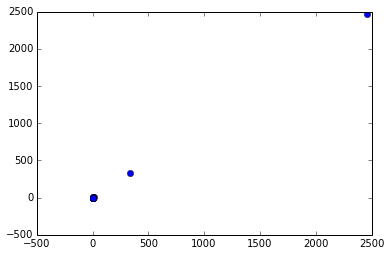

In [79]:
plt.plot(blockS[1,:],blockS[2,:],'o')
plt.show()

In [ ]:
    tout = 1000.0
      bin = .true.
      OPEN(1,file='Single.dat',status='old')
      if(bin) OPEN(2,file='Binary.dat',status='old')
      amin = 1.0e+10
      amax = -1.0e+10

      OPEN(3,file='extrct.dat',status='unknown')
      ipr = 0
      vstar = -1.d0
      trhsum = 0.d0
      iprsum = -1
      m0 = 0.d0

In [ ]:
*
* Read data
*
 1    READ(1,'(i8,f9.1)',end=9)ns,tphys
      READ(1,'(i8,3f6.2,3f10.5)')nc,rc,rbar,rtide,(xc(j),j=1,3)
      READ(1,'(f12.4,2f6.2)')zmbar,turn,rscale
      rc = MAX(rc,0.01d0)
      if(tout.ge.0.0.and.tphys.ge.tout)then
         OPEN(11,file='Single.dat.tmp',status='unknown')
         OPEN(21,file='Binary.dat.tmp',status='unknown')
         WRITE(11,'(i8,f9.1)')ns,tphys
         WRITE(11,'(i8,3f6.2,3f10.5)')nc,rc,rbar,rtide,(xc(j),j=1,3)
         WRITE(11,'(f12.4,2f6.2)')zmbar,turn,rscale
         write(*,*)' tout ',tout,tphys
      endif
      rmax = 1.0d-10
      mtot = 0.d0
      mout = 0.d0
      n1 = 0
      n2 = 0
      n1pc = 0
      vdisp = 0.d0
      msgl = 0.d0
      nsgl = 0
      mwd = 0.0
      nwd = 0
      m0 = zmbar
      if(ipr.eq.0)then
         pc = 3.0856776d+18
         au = pc/1.4959787d+12
         su = pc/(au*6.955d+10)*rbar*au
         if(vstar.lt.0.d0)then
            vstar = 0.06557d0*SQRT(m0/rbar)
            write(*,*)' ZMBAR RBAR VSTAR ',m0,rbar,vstar
         endif
         ebcut = (1.d0/zmbar)*(1.d0/zmbar)/(20.d0/su)
         write(*,*)' ebcut ',ebcut
      endif